># Igor Martinelli                9006336
># Zoltán Hirata Jetsmen  9293272

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline

In [210]:
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


>## Informações que podem ser relevantes para a análise (média, desvio padrão, mediana...)

In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


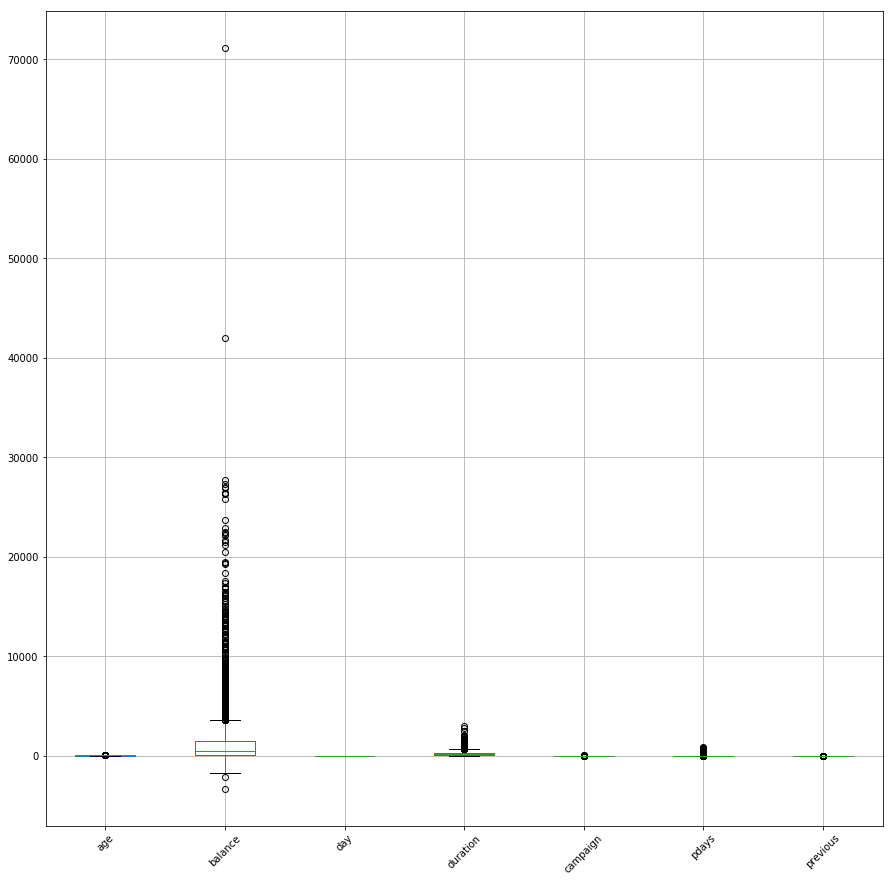

In [19]:
df_aux = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
df_aux.boxplot(rot=45, figsize=(15,15))

>## Como o gráfico acima fica ilegível por conta do atributo balance, que possui escala elevada em relação aos outros, vamos plotar os outros boxplots considerando outras variáveis.

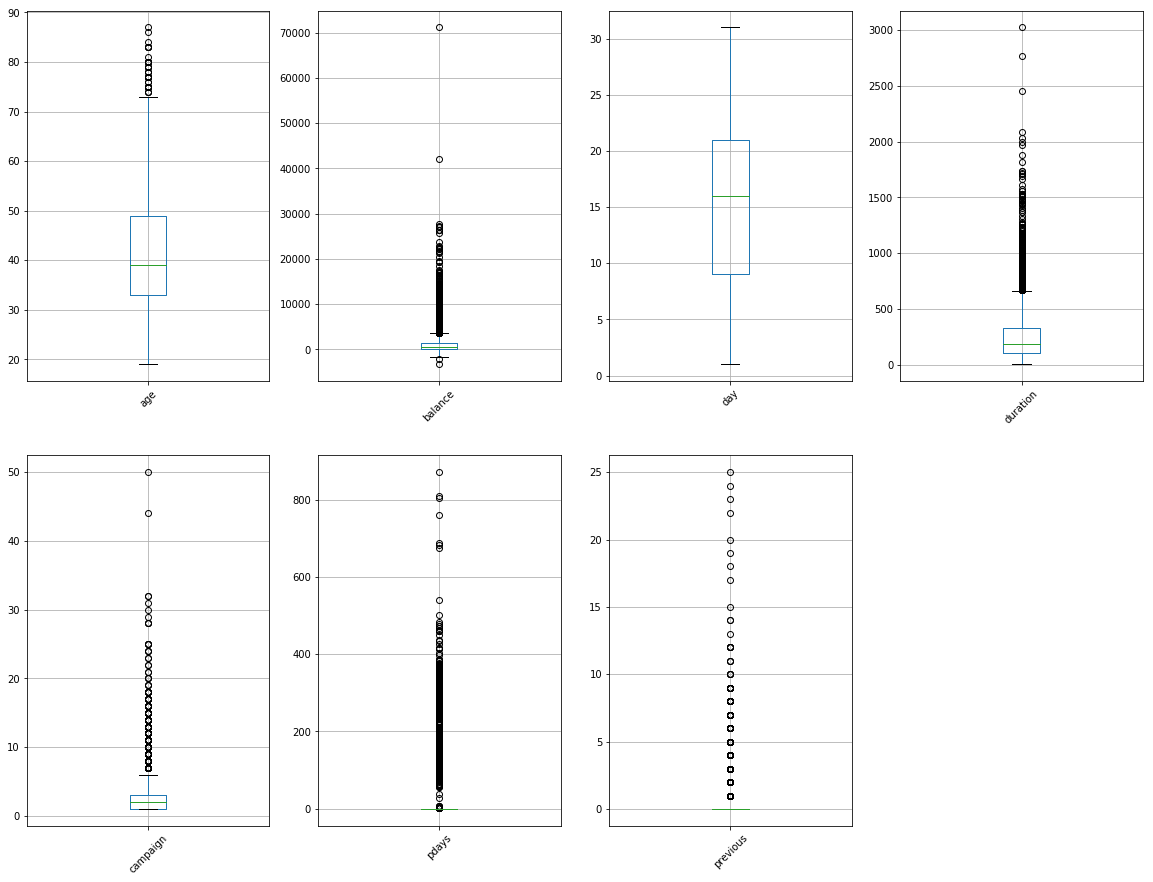

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
df_aux[['age']].boxplot(rot=45)
plt.subplot(2,4,2)
df_aux[['balance']].boxplot(rot=45)
plt.subplot(2,4,3)
df_aux[['day']].boxplot(rot=45)
plt.subplot(2,4,4)
df_aux[['duration']].boxplot(rot=45)
plt.subplot(2,4,5)
df_aux[['campaign']].boxplot(rot=45)
plt.subplot(2,4,6)
df_aux[['pdays']].boxplot(rot=45)
plt.subplot(2,4,7)
df_aux[['previous']].boxplot(rot=45)

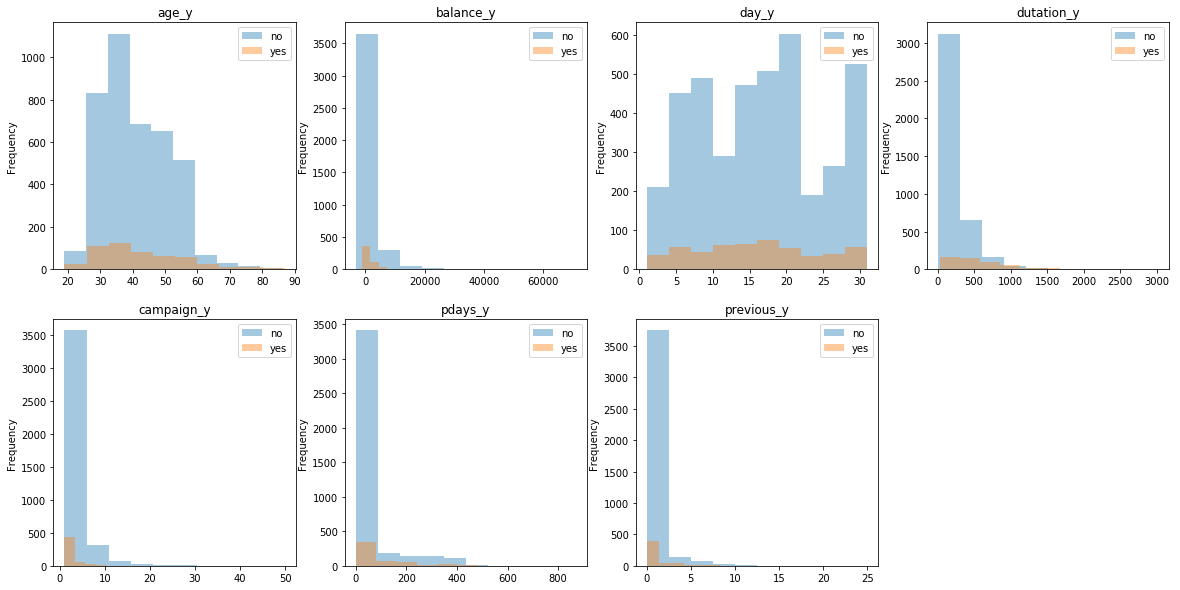

In [49]:
plt.figure(figsize=(20,10))

plt.subplot(241)
hist_age = df[['age', 'y']]
plt.title("age_y")
columns = hist_age.columns.tolist()
for i in hist_age.y.unique():
    hist_age.loc[hist_age.y == i, columns[0]].plot.hist(bins=10, alpha=0.4)
plt.legend(hist_age['y'].unique())

plt.subplot(242)
hist_age = df[['balance', 'y']]
plt.title("balance_y")
columns = hist_age.columns.tolist()
for i in hist_age.y.unique():
    hist_age.loc[hist_age.y == i, columns[0]].plot.hist(bins=10, alpha=0.4)
plt.legend(hist_age['y'].unique())

plt.subplot(243)
hist_age = df[['day', 'y']]
plt.title("day_y")
columns = hist_age.columns.tolist()
for i in hist_age.y.unique():
    hist_age.loc[hist_age.y == i, columns[0]].plot.hist(bins=10, alpha=0.4)
plt.legend(hist_age['y'].unique())

plt.subplot(244)
hist_age = df[['duration', 'y']]
plt.title("dutation_y")
columns = hist_age.columns.tolist()
for i in hist_age.y.unique():
    hist_age.loc[hist_age.y == i, columns[0]].plot.hist(bins=10, alpha=0.4)
plt.legend(hist_age['y'].unique())

plt.subplot(245)
hist_age = df[['campaign', 'y']]
plt.title("campaign_y")
columns = hist_age.columns.tolist()
for i in hist_age.y.unique():
    hist_age.loc[hist_age.y == i, columns[0]].plot.hist(bins=10, alpha=0.4)
plt.legend(hist_age['y'].unique())

plt.subplot(246)
hist_age = df[['pdays', 'y']]
plt.title("pdays_y")
columns = hist_age.columns.tolist()
for i in hist_age.y.unique():
    hist_age.loc[hist_age.y == i, columns[0]].plot.hist(bins=10, alpha=0.4)
plt.legend(hist_age['y'].unique())

plt.subplot(247)
hist_age = df[['previous', 'y']]
plt.title("previous_y")
columns = hist_age.columns.tolist()
for i in hist_age.y.unique():
    hist_age.loc[hist_age.y == i, columns[0]].plot.hist(bins=10, alpha=0.4)
plt.legend(hist_age['y'].unique())

plt.show()

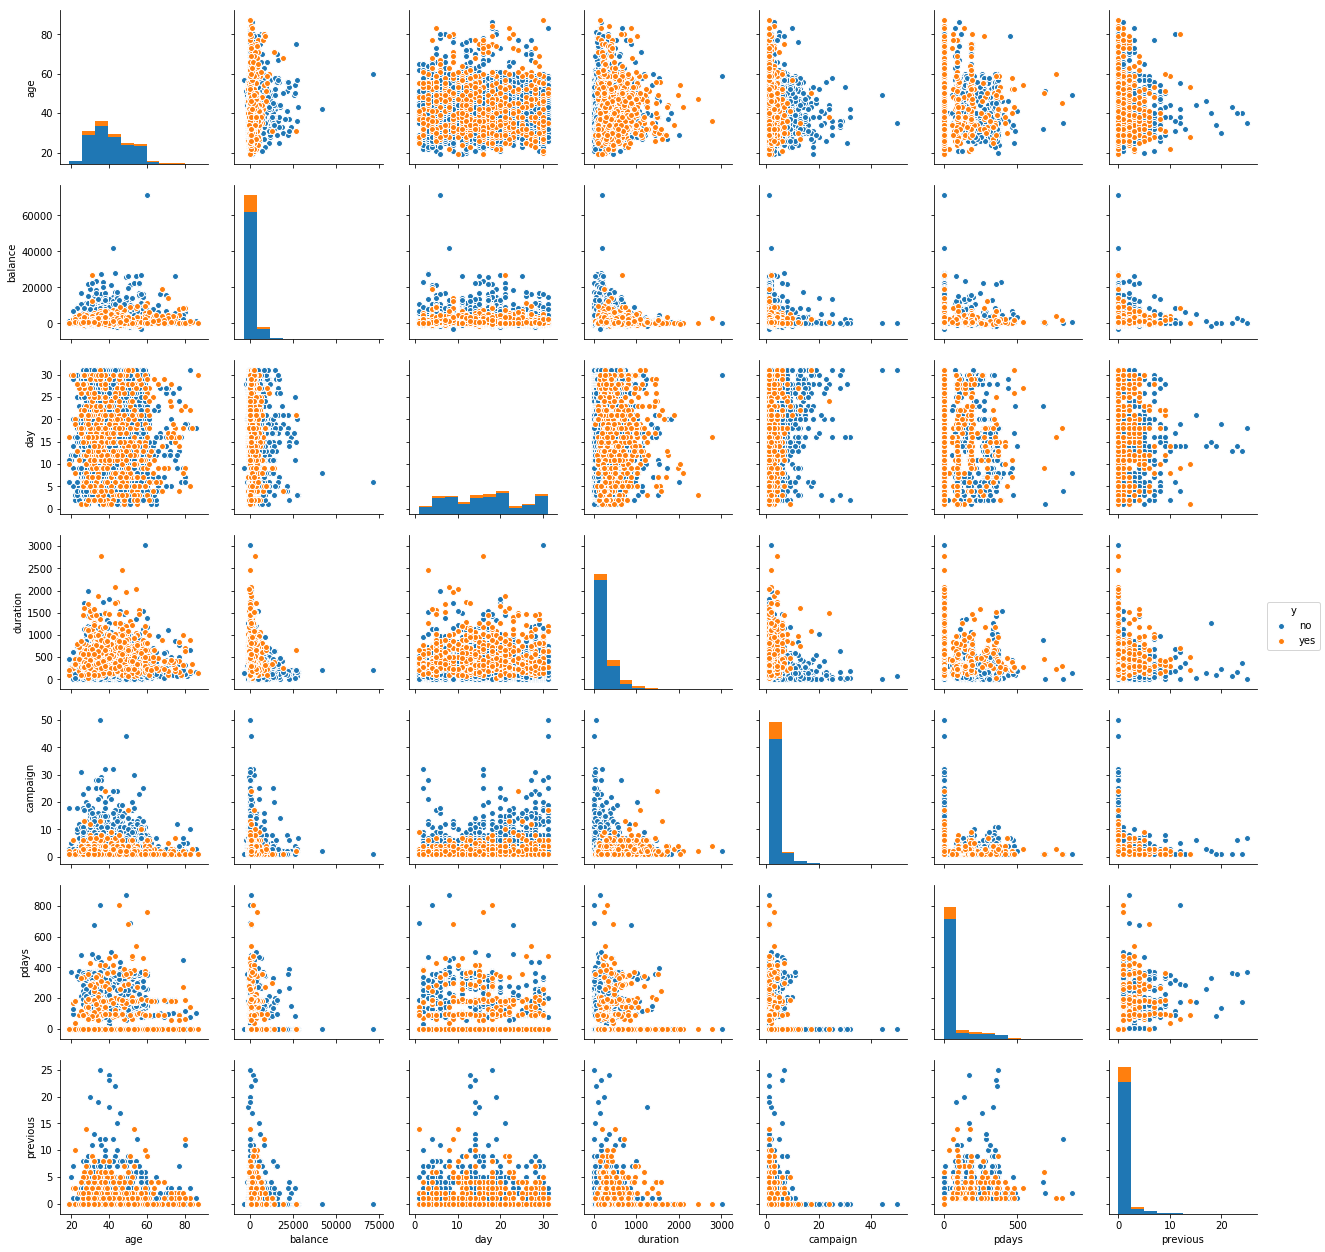

In [47]:
sns.pairplot(data=df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']], hue='y')

># 2 - Perguntas sobre os gráficos

>## 2.1
>>### Age - Os dados dessa variável estão consistentes tanto no boxplot, quanto no histograma, apresentando maior concentração no intervalo (20,70). Valores fora desse intervalo, como indicado no boxplot, podem ser considerados possíveis outliers.
>>### Balance - Os dados dessa variável possuem valores em escalas muito diferentes, variando de alguns valores negativos para valores positivos com valores muito altos. Sendo assim, pelo histograma pode-se observar uma maior concetração de dados no intervalo de aproximadamente (-3000, 10000), sendo que os valores fora disso poderiam ser analisados como possíveis outliers. Além disso, observando a função describe, mostrada no começo da análise, podemos ver que a mediana para o atributo tem o valor de 444, reforçando a ideia de que os valores fora do intervalo proposto podem ser cosiderados outliers, dado que a mediana é mais sensível a outliers. No entanto, a falta da normalização desse dado torna difícil sua análise.
>>### Day - Os dados referentes a este atributo estão bem consistentes nos dois gráficos, o que indica que não há outliers para esse atributo.
>>### Duration - Os dados para este atributo possuem valores com escalas diferentes, sendo que a maior concentração do mesmo aparece no intervalo (0, 800), sendo que a mediana possui um valor de 185, ou seja, valores fora desse intervalo podem ser vistos como possíveis outliers.
>>### Campaign - Para esse atributo, vemos que os dados diferem no boxplot e no histograma, isso se deve a concentração das classes, pelo que pode ser observado no histograma, pois, a partir de valores maiores que 5, aproximadamente, não há mais informações sobre a classe 'yes'. Isso explica a diferença observada nos gráficos. Desse modo, poderiam ser considerados outliers os valores acima de 10.
>>### Pdays - Para esse atributo, a análise de outliers deve ser mais sensível, pois, se observarmos sua mediana, boxplot e histograma, vemos que a concentração de dados próxima de -1 é muito grande, composta de aproximadamente 75% dos valores dessa variáveis. Desse modo, talvez os valores fora disso não sejam necessariamente outliers.
>>### Previous - Pela descrição desse atributo, vemos que o mesmo refere-se a quantidade de contatos feita antes da campanha por determinado cliente. Dessa maneira, assim como para o atributo pdays, os valores próximos de 0 estão muito concentrados, sendo aproximadamente 85% dos dados. Assim, os valores muito distantes de 0 podem ser considerados outliers com um nível de certeza maior.

>## 2.2

In [53]:
df_aux.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


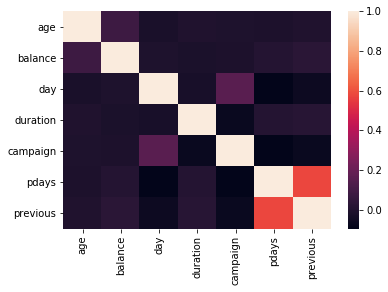

In [54]:
corr = df_aux.corr()
sns.heatmap(corr)

>>### Pelos valores acima e pelo heatmap gerado, vemos que os pares de atributos com maior correlação são 'pdays' e 'previous'

>## 2.3

>>### Sim, considerando os valores de correlação com o scatter plot gerado, pode-se observar que o par de atributos identificado acima é o que mais se aproxima de uma relação linear entre os dados, sendo que os outros dados não parecem demonstrar tal relação, o que é confirmado pela análise numérica de suas correlações, em que os mesmos demonstram valores próximos a 0.

>## 2.4


In [82]:
df.y.value_counts() #valor total do dataset.

no     4000
yes     521
Name: y, dtype: int64

In [70]:
aux = df[['marital', 'education', 'y']]
aux = aux[(aux.marital == 'married') & (aux.education == 'tertiary')]
aux.y.value_counts() #valor referente a ser casado e com diploma universitário.

no     632
yes     95
Name: y, dtype: int64

In [75]:
aux = df[['marital', 'education', 'y']]
aux = aux[(aux.marital == 'married') & (aux.education == 'secondary')]
aux.y.value_counts() #valor referente a ser casado e sem diploma universitário.

no     1300
yes     127
Name: y, dtype: int64

In [76]:
aux = df[['marital', 'education', 'y']]
aux = aux[(aux.marital == 'married') & (aux.education == 'primary')]
aux.y.value_counts() #valor referente a ser casado e com grau escolar incompleto.

no     485
yes     41
Name: y, dtype: int64

In [78]:
aux = df[['marital', 'education', 'y']]
aux = aux[(aux.marital == 'single') & (aux.education == 'primary')]
aux.y.value_counts() #valor referente a ser solteiro e com grau escolar incompleto.

no     64
yes     9
Name: y, dtype: int64

In [80]:
aux = df[['marital', 'education', 'y']]
aux = aux[(aux.marital == 'single') & (aux.education == 'secondary')]
aux.y.value_counts() #valor referente a ser solteiro e sem diploma universitário.

no     528
yes     81
Name: y, dtype: int64

In [81]:
aux = df[['marital', 'education', 'y']]
aux = aux[(aux.marital == 'single') & (aux.education == 'tertiary')]
aux.y.value_counts() #valor referente a ser solteiro e com diploma universitário.

no     393
yes     75
Name: y, dtype: int64

>>### Pelas análises acima, mostramos os valores referentes a assinar um termo de depósito para todos os casos possiveis, casado com grau escolar primário, secundário ou terciário e solteiro com grau escolar primário secundário e terciário. A partir disso, pode-se concluir que, ser casado e com diploma universitário, não impacta muito em assinar um termo de depósito. A partir das análise, ve-se que, as pessoas com ensino superior são, em proporção as que mais assinam o termo de depósito, sendo que, quando solteiro, essa proporção é maior do que quando casado.

>## 2.5

In [96]:
aux = df[['marital', 'education', 'default', 'y']]
aux = aux[(aux.marital == 'married') & (aux.education == 'tertiary') & (aux.y == 'no')]
aux.default.value_counts()

no     627
yes      5
Name: default, dtype: int64

In [102]:
aux = aux.default.value_counts()
aux.yes/(aux.no+aux.yes)*100

0.7911392405063291

>>### Vemos, pelos cálculos realizados acima que, dentre os casados e com diploma universitário, que não assinaram um termo de depósito, apenas 0.79% deixaram de pagar um crédito anterior.

># 3

>>### Considerando os 16 atributos fornecidos, se fosse realizar a tarefa de classificação, para selecionar os atributos numéricos a ser utilizados, tendo em vista as análises realizadas, utlizando principalmente o scatter plot, seriam escolhidas as variáveis 'age', 'balance' e 'campaign', pois há uma boa separação visual entre as classes. Quanto aos atributos categóricos, pela descrição dos mesmos, escolheriamos os atributos job, education, housing e loan, pois os mesmos influenciam na classificação final.

># 4

>## 4.1 
>>### A distribuição de classes para o conjunto de dados original pode ser observada abaixo.

In [103]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

>## 4.2

>>### Para a realização do balanceamento, será utilizada uma abordagem híbrida de subamostragem e sobreamostragem, pois, como nesse caso temos uma proporção de dados muito diferente, seria mais interessante combinar as duas técnicas a fim de não realizar a criação de muitos dados artificiais (sobreamostragem) e, ao mesmo tempo, não perder tanta informação dos dados originais (subamostragem).

>## 4.3

In [105]:
df_undersampling = df[df.y == 'no']
df_undersampling.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [113]:
df_undersampling = df_undersampling.sample(n=1500, replace=True)
df_undersampling

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
524,45,services,married,secondary,no,-839,yes,no,unknown,28,may,68,1,-1,0,unknown,no
2615,45,blue-collar,married,secondary,no,776,yes,no,cellular,6,feb,232,4,253,1,failure,no
1553,34,blue-collar,married,secondary,no,3990,yes,no,cellular,24,jul,633,7,-1,0,unknown,no
278,50,blue-collar,married,primary,no,5776,no,no,cellular,18,nov,49,3,-1,0,unknown,no
2918,29,admin.,single,tertiary,no,14,no,no,cellular,29,sep,87,1,120,1,failure,no
1010,23,student,single,secondary,no,8494,no,no,cellular,25,aug,158,2,-1,0,unknown,no
3899,29,management,single,tertiary,no,3357,no,no,cellular,21,jul,120,3,-1,0,unknown,no
2330,26,technician,single,secondary,no,7,yes,no,cellular,22,jul,188,2,-1,0,unknown,no
1298,25,student,single,secondary,no,1116,yes,no,cellular,2,mar,170,3,-1,0,unknown,no
836,55,housemaid,married,primary,no,16,no,no,unknown,20,jun,64,1,-1,0,unknown,no


In [109]:
df_oversampling = df[df.y == 'yes']
df_oversampling.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes


In [112]:
df_oversampling = df_oversampling.sample(n=1500, replace=True)
df_oversampling

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1449,31,management,married,tertiary,no,1224,yes,yes,cellular,24,jul,1441,2,-1,0,unknown,yes
53,34,technician,married,tertiary,no,1539,yes,no,cellular,15,jun,441,1,56,1,other,yes
2568,61,retired,married,secondary,no,2917,no,no,cellular,6,oct,215,1,-1,0,unknown,yes
3740,36,blue-collar,divorced,primary,no,-308,yes,no,cellular,12,may,725,1,-1,0,unknown,yes
3589,38,management,married,unknown,no,3576,no,no,cellular,25,nov,349,2,183,1,success,yes
3317,25,management,single,tertiary,no,808,no,no,cellular,18,sep,267,2,114,2,failure,yes
1151,44,admin.,married,secondary,no,205,no,no,cellular,3,nov,289,1,-1,0,unknown,yes
1425,36,management,married,tertiary,no,495,no,no,cellular,5,aug,157,3,97,2,success,yes
3424,55,technician,married,secondary,yes,-308,no,no,cellular,2,feb,781,1,-1,0,unknown,yes
4282,34,admin.,divorced,secondary,no,-251,no,no,cellular,18,jul,641,1,-1,0,unknown,yes


In [117]:
df_balanced = pd.concat([df_undersampling, df_oversampling])
df_balanced.reset_index(inplace=True, drop=True)
df_balanced

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,45,services,married,secondary,no,-839,yes,no,unknown,28,may,68,1,-1,0,unknown,no
1,45,blue-collar,married,secondary,no,776,yes,no,cellular,6,feb,232,4,253,1,failure,no
2,34,blue-collar,married,secondary,no,3990,yes,no,cellular,24,jul,633,7,-1,0,unknown,no
3,50,blue-collar,married,primary,no,5776,no,no,cellular,18,nov,49,3,-1,0,unknown,no
4,29,admin.,single,tertiary,no,14,no,no,cellular,29,sep,87,1,120,1,failure,no
5,23,student,single,secondary,no,8494,no,no,cellular,25,aug,158,2,-1,0,unknown,no
6,29,management,single,tertiary,no,3357,no,no,cellular,21,jul,120,3,-1,0,unknown,no
7,26,technician,single,secondary,no,7,yes,no,cellular,22,jul,188,2,-1,0,unknown,no
8,25,student,single,secondary,no,1116,yes,no,cellular,2,mar,170,3,-1,0,unknown,no
9,55,housemaid,married,primary,no,16,no,no,unknown,20,jun,64,1,-1,0,unknown,no


>## 4.4 - Distribuição final do conjunto de dados.

In [118]:
df_balanced.y.value_counts()

no     1500
yes    1500
Name: y, dtype: int64

># 5 - Normalização de dados (conjunto original)

>## 5.1

In [124]:
df_aux.head() #conjunto de dados que contém apenas as variáveis numéricas

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [134]:
normalization_zero_one = preprocessing.MinMaxScaler().fit_transform(df_aux)
normalization_zero_one = pd.DataFrame(normalization_zero_one, columns=['age', 'balance', 'day',
                                                                       'duration', 'campaign', 'pdays', 'previous'])
normalization_zero_one

,age,balance,day,duration,campaign,pdays,previous
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00
5,0.235294,0.054496,0.733333,0.045349,0.020408,0.202982,0.12
6,0.250000,0.048590,0.433333,0.111552,0.000000,0.379587,0.08
7,0.294118,0.046442,0.166667,0.048659,0.020408,0.000000,0.00
8,0.323529,0.047436,0.433333,0.017544,0.020408,0.000000,0.00
9,0.352941,0.043288,0.533333,0.102284,0.000000,0.169725,0.08


In [136]:
normalization_zscore = stats.zscore(df_aux, axis=0, ddof=0)
normalization_zscore = pd.DataFrame(normalization_zscore, columns=['age', 'balance', 'day',
                                                                       'duration', 'campaign', 'pdays', 'previous'])
normalization_zscore

,age,balance,day,duration,campaign,pdays,previous
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413
5,-0.583458,-0.224523,0.859091,-0.473241,-0.255231,1.360836,1.451197
6,-0.488896,-0.370736,-0.232247,0.296499,-0.576829,2.899143,0.860660
7,-0.205209,-0.423904,-1.202326,-0.434754,-0.255231,-0.407218,-0.320413
8,-0.016085,-0.399314,-0.232247,-0.796532,-0.255231,-0.407218,-0.320413
9,0.173040,-0.501996,0.131532,0.188735,-0.576829,1.071155,0.860660


>## 5.2 - boxplot antes e depois das técnicas de normalização

# Antes da normalização

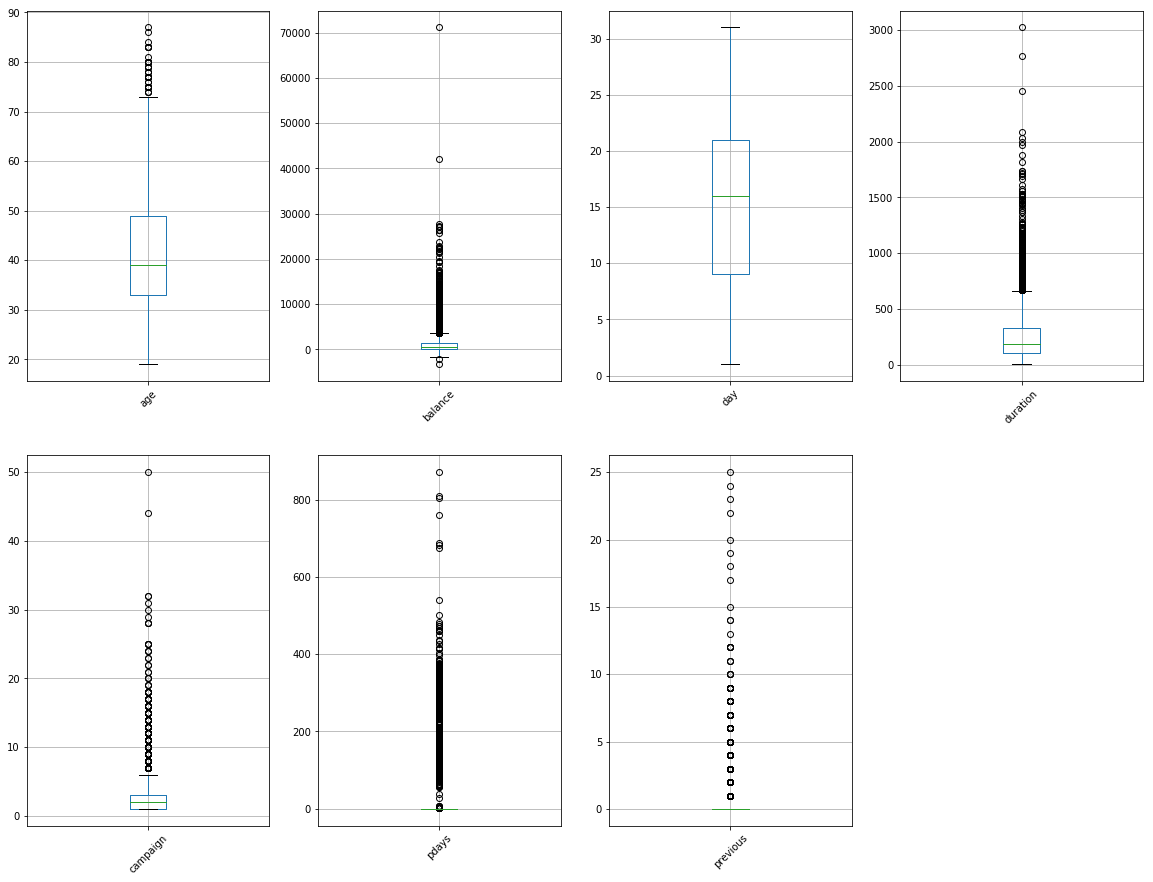

In [138]:
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
df_aux[['age']].boxplot(rot=45)
plt.subplot(2,4,2)
df_aux[['balance']].boxplot(rot=45)
plt.subplot(2,4,3)
df_aux[['day']].boxplot(rot=45)
plt.subplot(2,4,4)
df_aux[['duration']].boxplot(rot=45)
plt.subplot(2,4,5)
df_aux[['campaign']].boxplot(rot=45)
plt.subplot(2,4,6)
df_aux[['pdays']].boxplot(rot=45)
plt.subplot(2,4,7)
df_aux[['previous']].boxplot(rot=45)

# Boxplost para a normalização 0-1

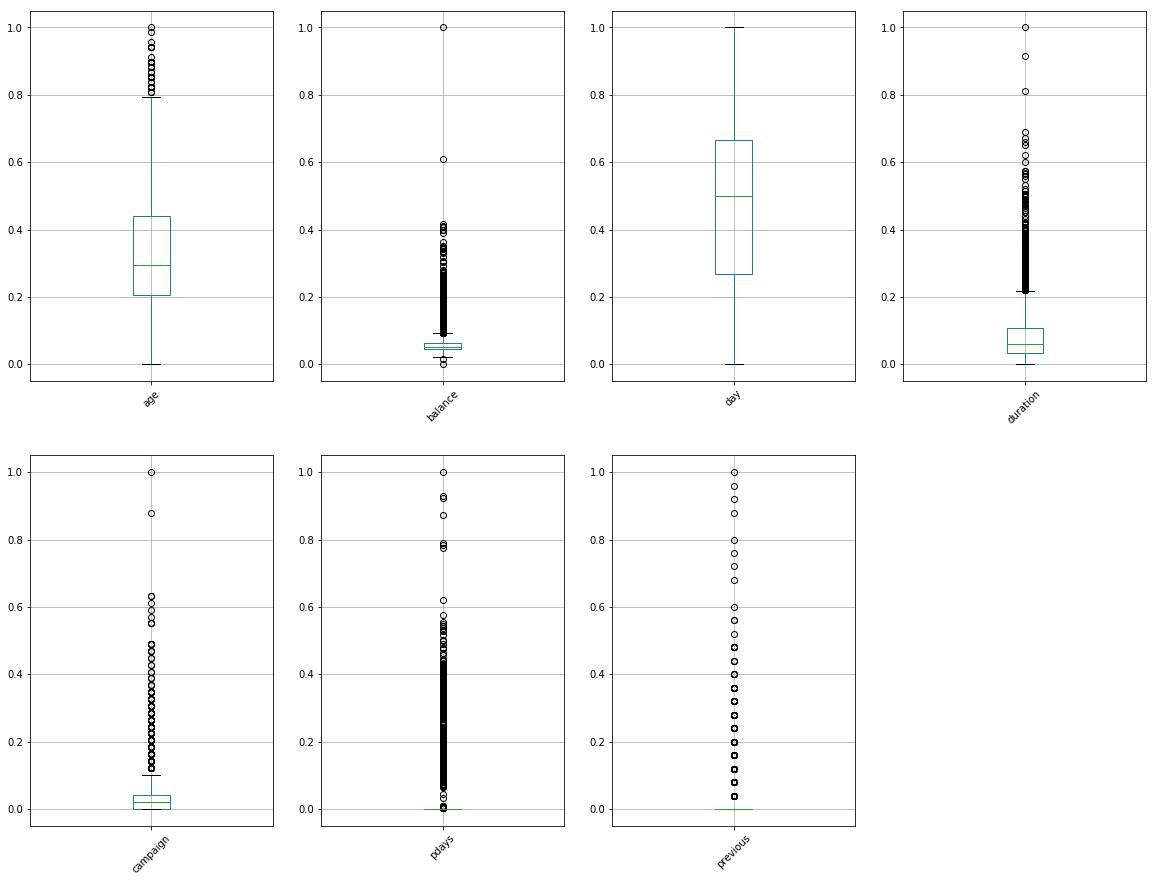

In [140]:
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
normalization_zero_one[['age']].boxplot(rot=45)
plt.subplot(2,4,2)
normalization_zero_one[['balance']].boxplot(rot=45)
plt.subplot(2,4,3)
normalization_zero_one[['day']].boxplot(rot=45)
plt.subplot(2,4,4)
normalization_zero_one[['duration']].boxplot(rot=45)
plt.subplot(2,4,5)
normalization_zero_one[['campaign']].boxplot(rot=45)
plt.subplot(2,4,6)
normalization_zero_one[['pdays']].boxplot(rot=45)
plt.subplot(2,4,7)
normalization_zero_one[['previous']].boxplot(rot=45)

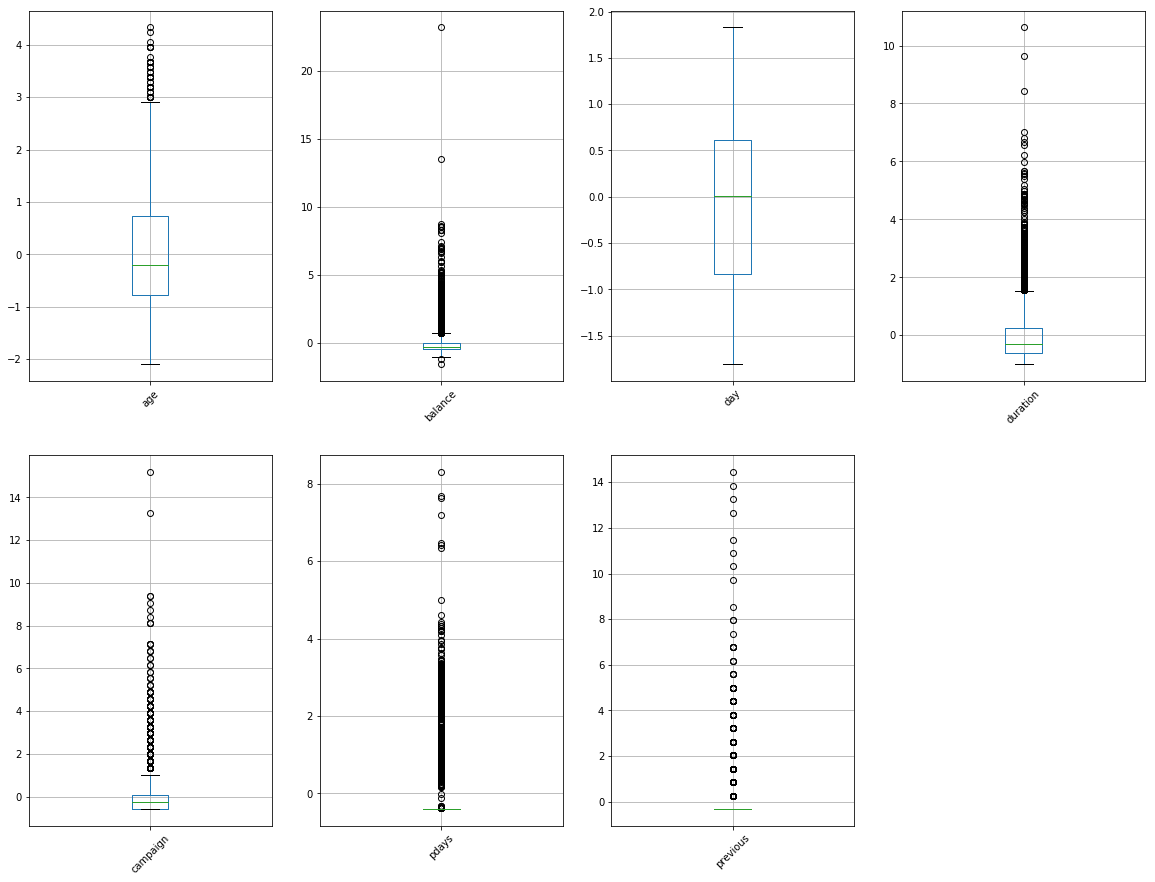

In [141]:
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
normalization_zscore[['age']].boxplot(rot=45)
plt.subplot(2,4,2)
normalization_zscore[['balance']].boxplot(rot=45)
plt.subplot(2,4,3)
normalization_zscore[['day']].boxplot(rot=45)
plt.subplot(2,4,4)
normalization_zscore[['duration']].boxplot(rot=45)
plt.subplot(2,4,5)
normalization_zscore[['campaign']].boxplot(rot=45)
plt.subplot(2,4,6)
normalization_zscore[['pdays']].boxplot(rot=45)
plt.subplot(2,4,7)
normalization_zscore[['previous']].boxplot(rot=45)